# Problem :

IMDB movie review sentiment classification problem. Each movie review is a variable sequence of words and the sentiment of each movie review must be classified. The IMDB Movie Review Dataset contains 25,000 highly-polar movie reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given movie review has a positive or negative sentiment. Keras provides access to the IMDB dataset built-in. The imdb.load_data() function allows you to load the dataset in a format that is ready for use in neural network and deep learning models. The words have been replaced by integers that indicate the ordered frequency of each word in the dataset. The sentences in each review are therefore comprised of a sequence of integers.

# Why CNN with LSTM for text Classifcation

CNNs are generally used in computer vision, however they’ve recently been applied to various NLP tasks and the results were promising.
Let’s briefly see what happens when we use CNN on text data through a diagram.The result of each convolution will fire when a special pattern is detected. By varying the size of the kernels and concatenating their outputs, you’re allowing yourself to detect patterns of multiples sizes (2, 3, or 5 adjacent words).Patterns could be expressions (word ngrams?) like “I hate”, “very good” and therefore CNNs can identify them in the sentence regardless of their position.
Recurrent neural networks can obtain context information but the order of words will lead to bias; the text analysis method based on Convolutional neural network (CNN) can obtain important features of text through pooling but it is difficult to obtain contextual information which can be leverage using LSTM. So using the combination of CNN with LSTM could give us some intresting results

# Develop an text classification model based on CNN + LSTM in Keras.

In this assignment, you will have to train two Text classification:
1) LSTM based Text Classification
2) CNN + LSTM based Text Classification

After training the two different classification, you have to compare the accuracy on both of the model trained and report the best accuracy for which of them.

This notebook is divided into six parts. Total : [8 Marks]

1. Import the required Libraires [1 Mark]
2. Implement the LSTM model [2 Marks]
3. Calculate the LSTM model accuracy [1 Mark]
4. Implement the CNN + LSTM [3 Marks]
5. Calculate the CNN + LSTM model accuracy [1 Mark]

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import imdb

#import the required library

# Student will have to code here
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# Students will end their code here

In [5]:
# load the dataset but only keep the top n words, zero the rest
top_words = 10000

import numpy as np

np.load.__defaults__=(None, True, True, 'ASCII')

# call load_data with allow_pickle implicitly set to true
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.2)
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)
print("Shape of CV data:", X_cv.shape)

# truncate and pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
X_cv = sequence.pad_sequences(X_cv,maxlen=max_review_length)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Shape of train data: (20000,)
Shape of Test data: (25000,)
Shape of CV data: (5000,)


In [6]:
y_train[0:5]

array([1, 1, 0, 1, 1])

In [7]:
# Decoding the data coded data of IMDB ( Data Understanding )
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X_train[0]] )
print(decoded) 



1646592/1641221 [==============================] - 0s 0us/step
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [8]:
# Architecture Diagram for LSTM Based Classifcation but you will have to change the
# configuration/model parameters while implementing it depending on the input , output and the 
# Problem statement.

from IPython.display import Image
Image(url='https://drive.google.com/file/d/1jrO-CJIAf0K5j0duqz2egdx_PyOtbcEW/view?usp=sharing')


In [9]:
import tensorflow as tf

embedding_vector_length = 32
model = tf.keras.Sequential()

# Write the code for LSTM Based Classifcation
# Embedding layer
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer

# Students will be starting their code from here:
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Students will be ending their code here

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Change the number of epochs and the batch size depending on the RAM Size

model.fit(X_train, y_train, epochs=5, batch_size=64,verbose = 1,validation_data=(X_cv,y_cv))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
313/313 [==============================] - 466s 1s/step - loss: 0.6435 - accuracy: 0.6358 - val_loss: 0.3877 - val_accuracy: 0.8376
Epoch 2/5
313/313 [==============================] - 463s 1s/step - loss: 0.3607 - accuracy: 0.8498 - val_loss: 0.3343 - val_accuracy: 0.8612
Epoch 3/5
313/313 [==============================] - 456s 1s/step - loss: 0.2297 - accura

In [10]:
# Final evaluation of the model using test dataset
# Students will be starting their code from here:
scores = model.evaluate(X_test, y_test, verbose=1,batch_size = 256)
print("Accuracy: %.2f%%" % (scores[1]*100))


98/98 [==============================] - 60s 612ms/step - loss: 0.3705 - accuracy: 0.8608
Accuracy: 86.08%


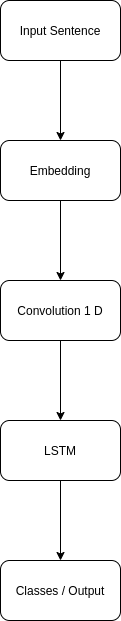

In [ ]:
# High Level Model Architecture
from IPython.display import Image
Image(filename='1_VGtBedNuZyX9E-07gnm2Yg.png')


In [13]:
# create the model
embedding_vector_length = 32
model = tf.keras.Sequential()
# Students will be starting their code from here:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding


# Write the code for LSTM Based Classifcation
# Embedding layer
# Convolution-1D Layer : You are free to choose the hyperparameters and the number of layers
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Students will be ending their code here

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Change the number of epochs and the batch size depending on the RAM Size

model.fit(X_train, y_train, epochs=5, batch_size=64,verbose = 1,validation_data=(X_cv,y_cv))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 32)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 600, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 300, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
313/313 [==============================] - 133s 419ms/step - loss: 0.5985 - accuracy: 0.6376 - val_

In [14]:
# Final evaluation of the CNN + RNN model using the test data
# Students will be starting their code from here:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.12%
